# Importing the libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Loading the Data set

In [80]:
df=pd.read_excel('/content/marketing_campaign1 (1) (1).xlsx',sheet_name=0)
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   
5  2013-09-09       16       520  ...                  6             0   
6  2012-11-13       34       235  ...                  6             0   
7  2013-05-08       32        76  ...                  8             0   
8  2013-06-06       19        14  ...                  9             0   
9  2014-03-13       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

In [81]:
df.tail(10)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2230   7004        1984  Graduation         Single   11012.0        1   
2231   9817        1970      Master         Single   44802.0        0   
2232   8080        1986  Graduation         Single   26816.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   
2234   8372        1974  Graduation        Married   34421.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2238   8235        1956      Master       Together   69245.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2230         0  2013-03-16       82        24  ...                  9   
2231         0  2012-08-21       71       853  ...                  8   
2232         0  2012-08-17       50         5  ...                  4   
2233         0  2013-06-02       23         9  ...                  6   
2234         0  2013-07-01       81         3  ...                  7   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2230             1             0             0             0             0   
2231             0             0             0             0             0   
2232             0             0             0             0             0   
2233             0             0             0             0             0   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2230         0              3         11         0  
2231         0              3         11         0  
2232         0              3         11         0  
2233         0              3         11         0  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[10 rows x 29 columns]

In [82]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [83]:
df.shape

(2240, 29)

## Understanding the data structure

In [84]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

# About the dataset

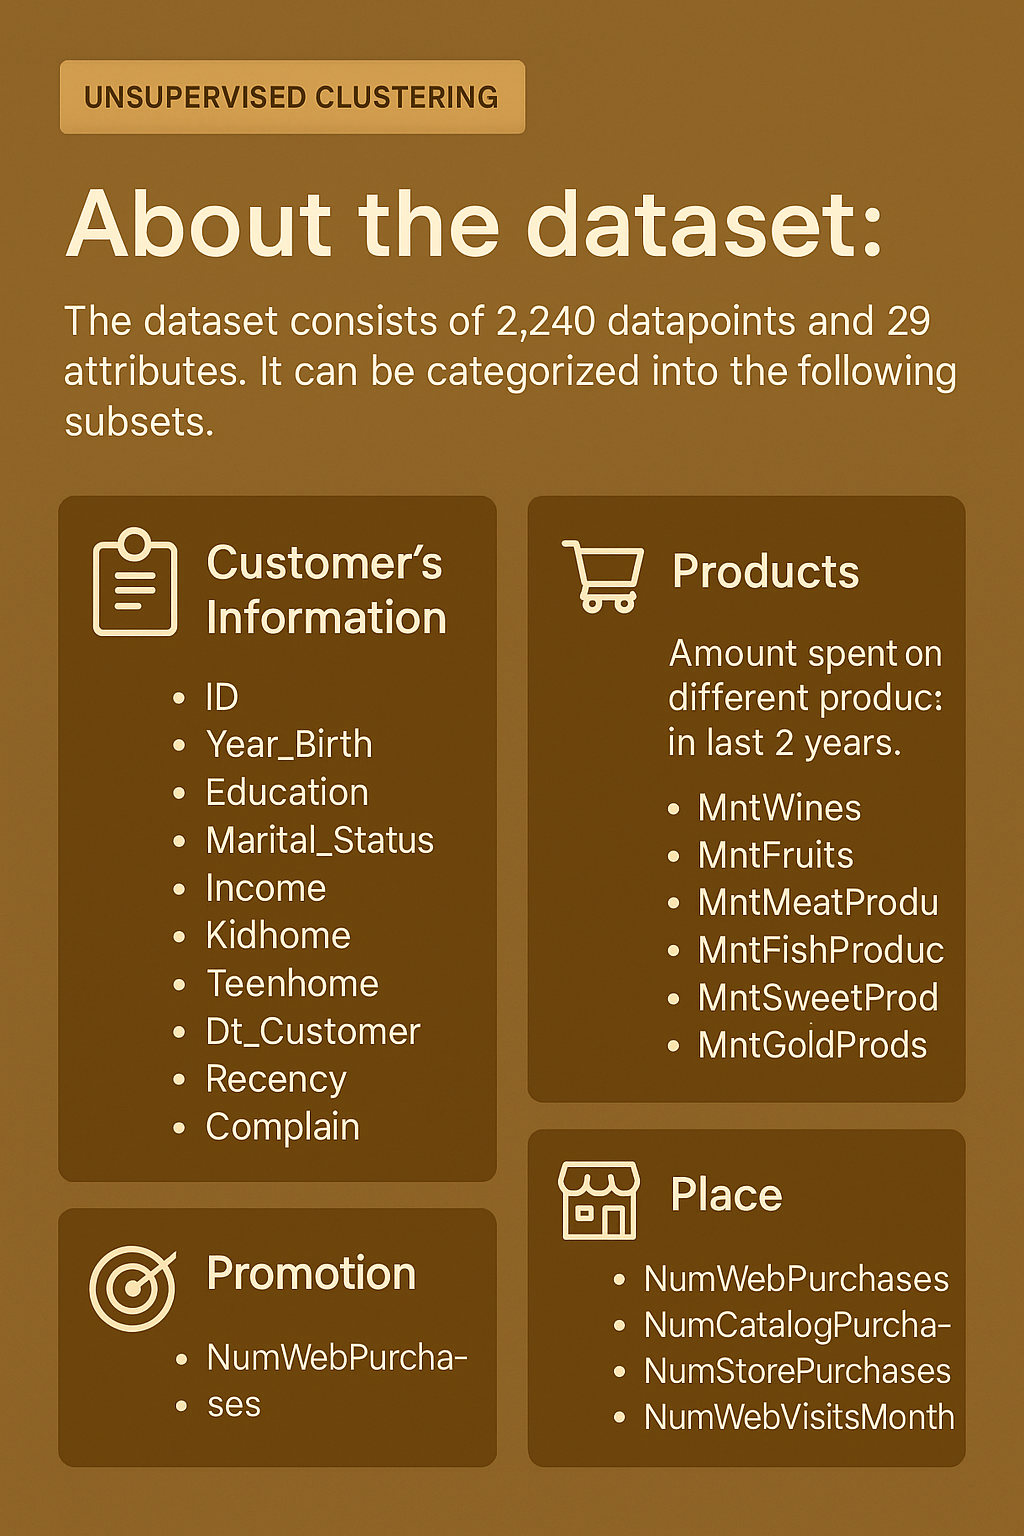

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Handling the missing values

In [86]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [87]:
df['Income'].fillna(df['Income'].median(),inplace=True)

In [88]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [89]:
df.reset_index(drop=True, inplace=True)


In [90]:
df.duplicated().sum()

np.int64(0)

In [91]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [92]:
df.drop(['ID'],axis=1,inplace=True)

In [93]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0     2012-09-04       58       635         88  ...                  7   
1     2014-03-08       38        11          1  ...                  5   
2     2013-08-21       26       426         49  ...                  4   
3     2014-02-10       26        11          4  ...                  6   
4     2014-01-19       94       173         43  ...                  5   
...          ...      ...       ...        ...  ...                ...   
2235  2013-06-13       46       709         43  ...                  5   
2236  2014-06-10       56       406          0  ...                  7   
2237  2014-01-25       91       908         48  ...                  6   
2238  2014-01-24        8       428         30  ...                  3   
2239  2012-10-15       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

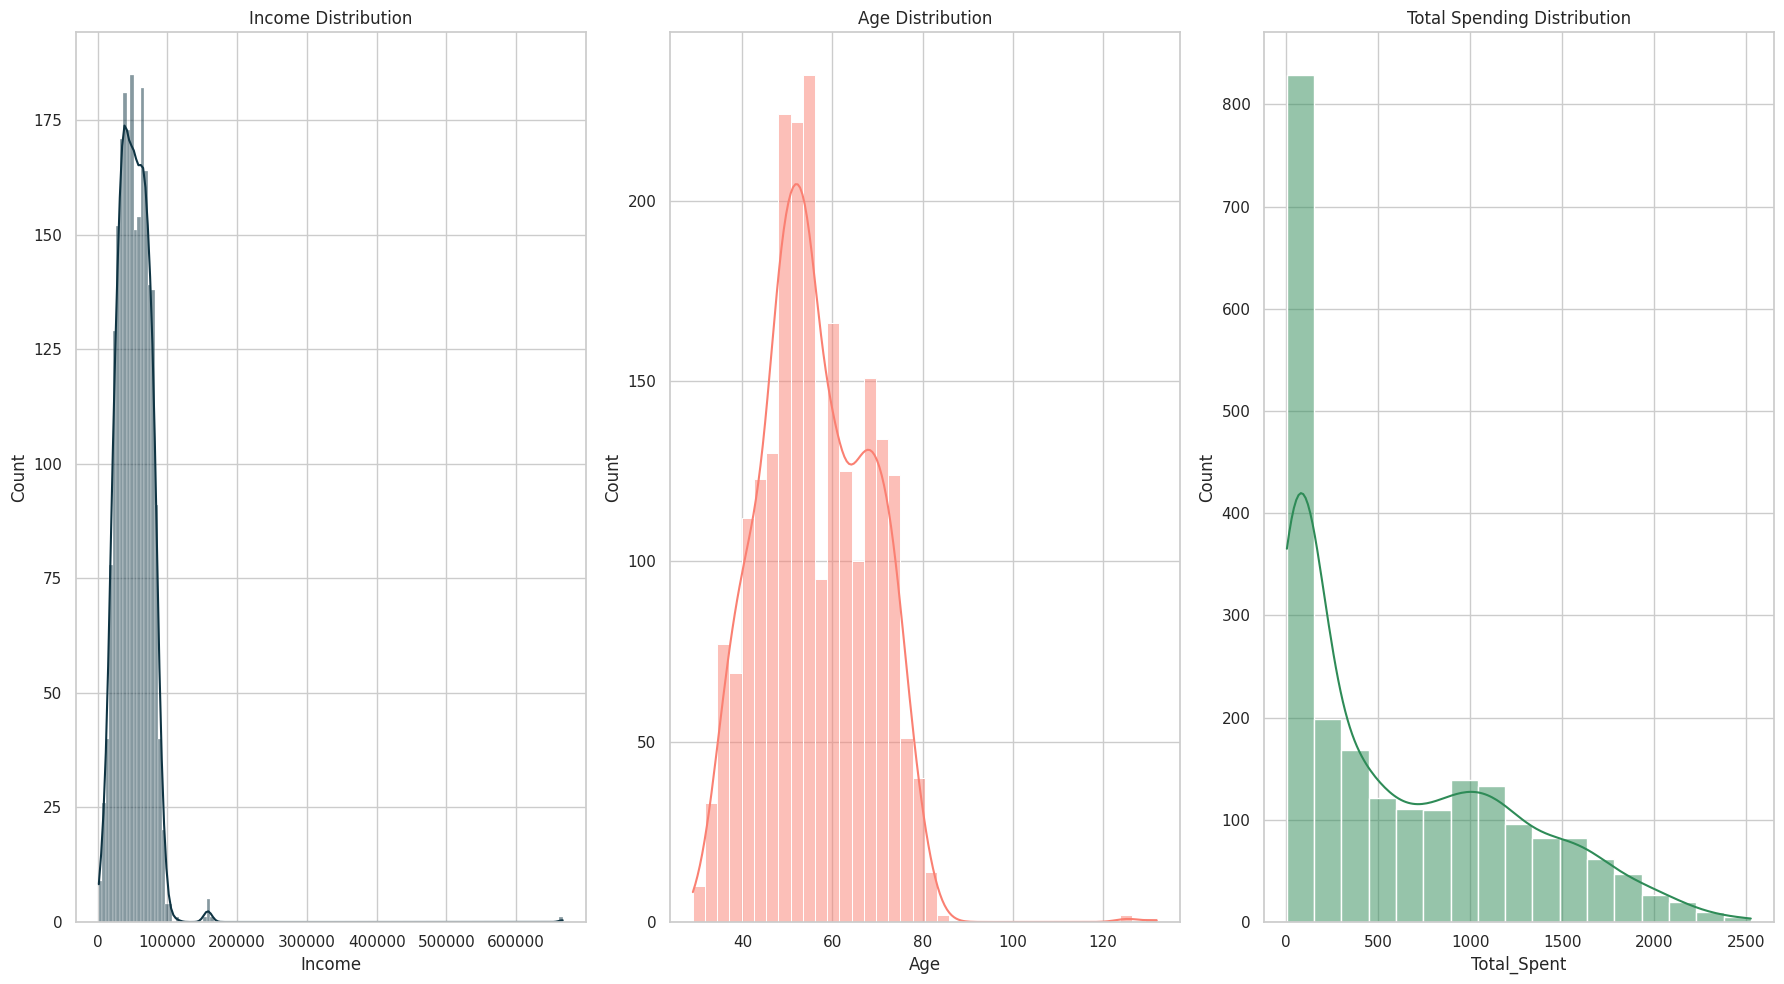

In [94]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df['Age'] = datetime.now().year - df['Year_Birth']
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Set seaborn style
sns.set(style="whitegrid")

# Create a 1x3 plot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Plot Income
sns.histplot(df['Income'].dropna(), kde=True, ax=axes[0], color="#0f3443")
axes[0].set_title("Income Distribution")

# Plot Age
sns.histplot(df['Age'], kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Age Distribution")

# Plot Total Spending
sns.histplot(df['Total_Spent'], kde=True, ax=axes[2], color="seagreen")
axes[2].set_title("Total Spending Distribution")

plt.tight_layout()
plt.show()

* Income shows a slightly right-skewed distribution, indicating most customers have moderate incomes with a few high earners.

* Age is concentrated between 30–60 years, reflecting a mature customer base.

* Total Spending reveals that a majority of customers spend within a mid-range, with fewer heavy spenders driving higher totals.

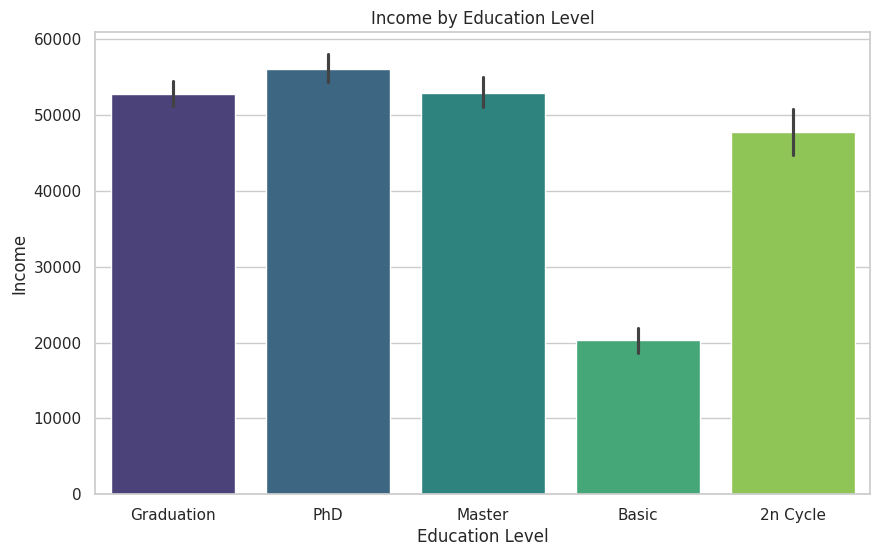

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=df,palette='viridis')
plt.title('Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()


* The plot shows that income generally increases with higher education levels, with PhD and Master’s degree holders earning the most.

* Customers with basic or 2n Cycle education tend to have lower incomes, highlighting a positive correlation between education and earning potential.

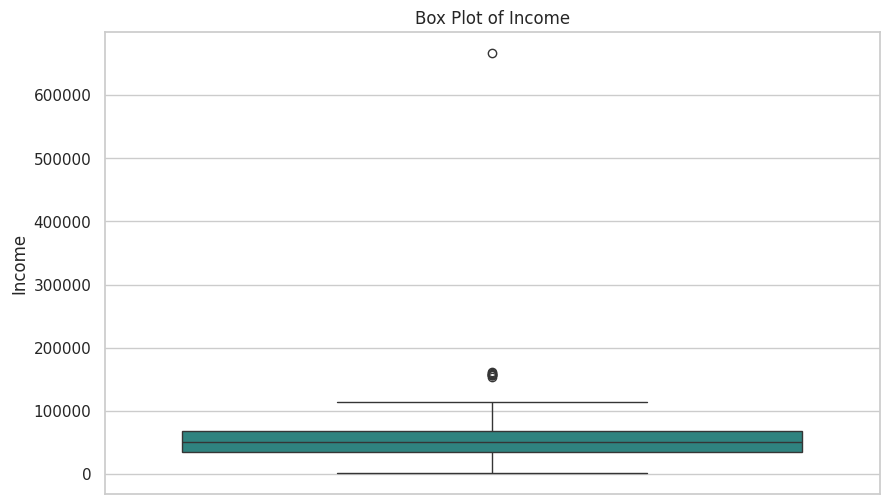

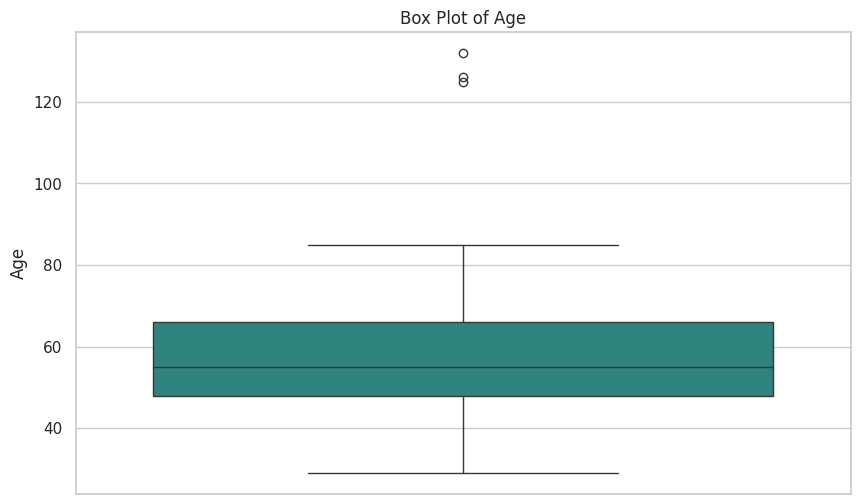

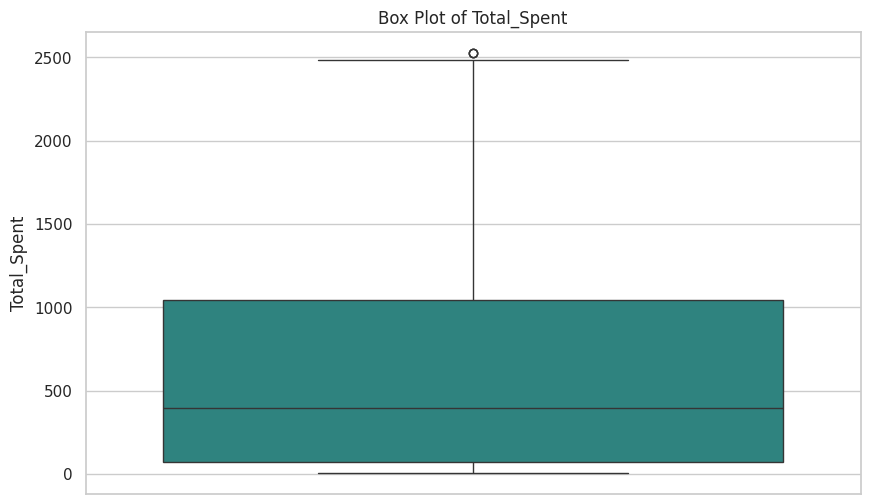

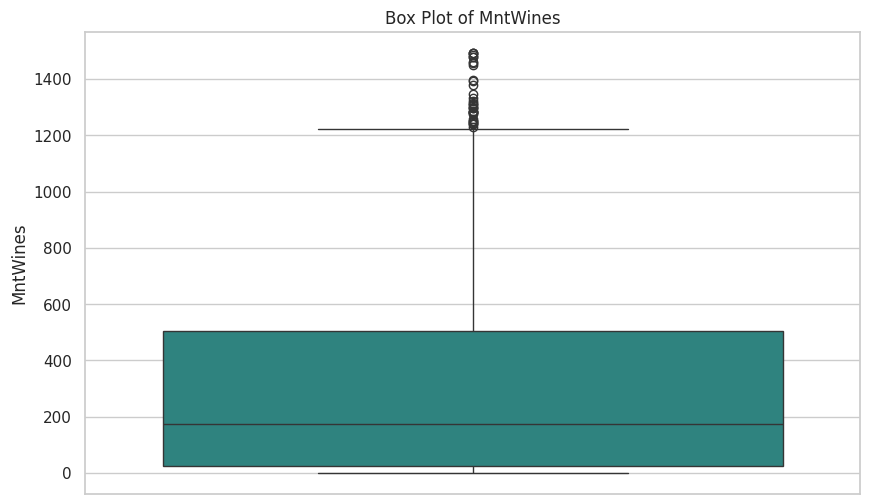

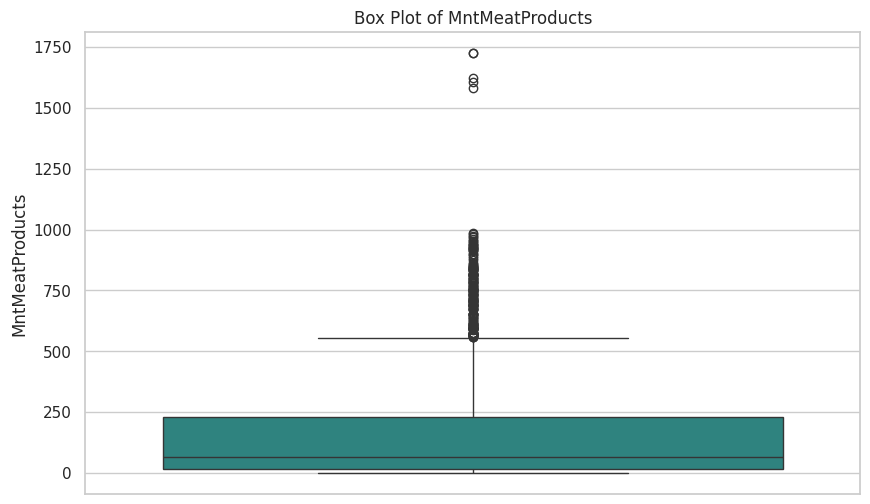

In [96]:
for col in ['Income', 'Age', 'Total_Spent', 'MntWines', 'MntMeatProducts']:
  plt.figure(figsize=(10,6))
  sns.boxplot(data=df, y=col,palette='viridis')
  plt.title(f'Box Plot of {col}')
  plt.show()

In [97]:
for col in ['Income', 'Age', 'Total_Spent', 'MntWines', 'MntMeatProducts']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[col]=df[col].clip(lower_bound,upper_bound)

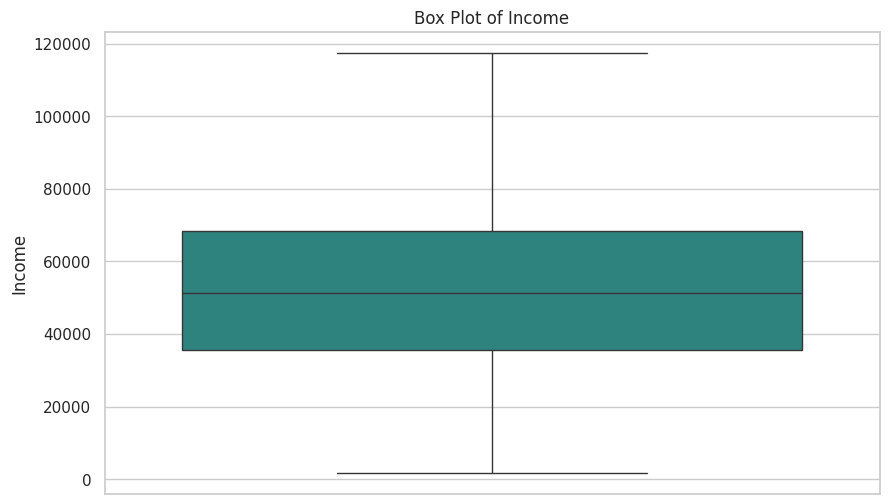

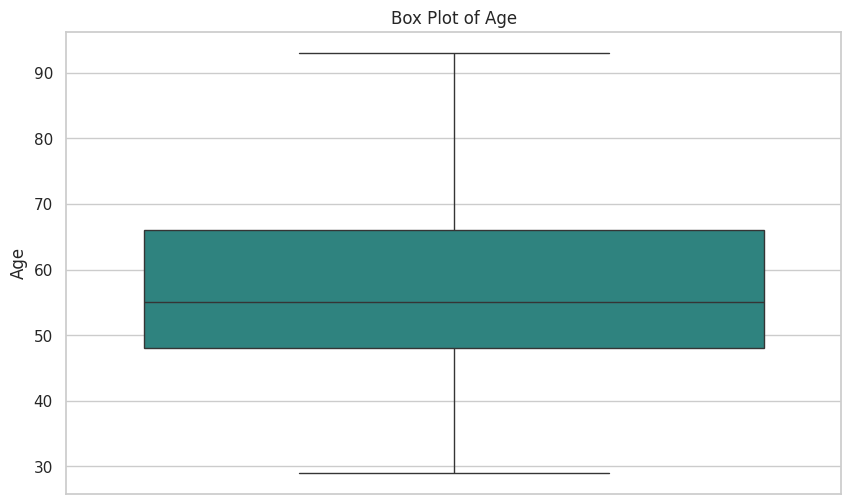

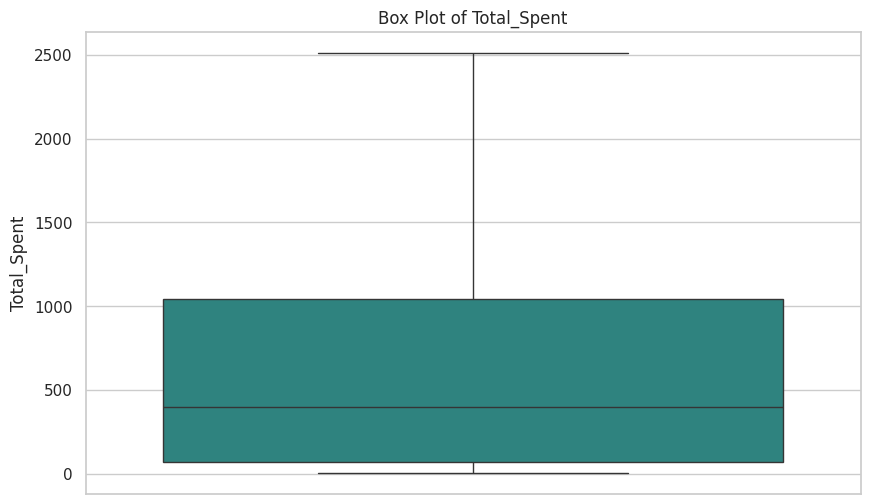

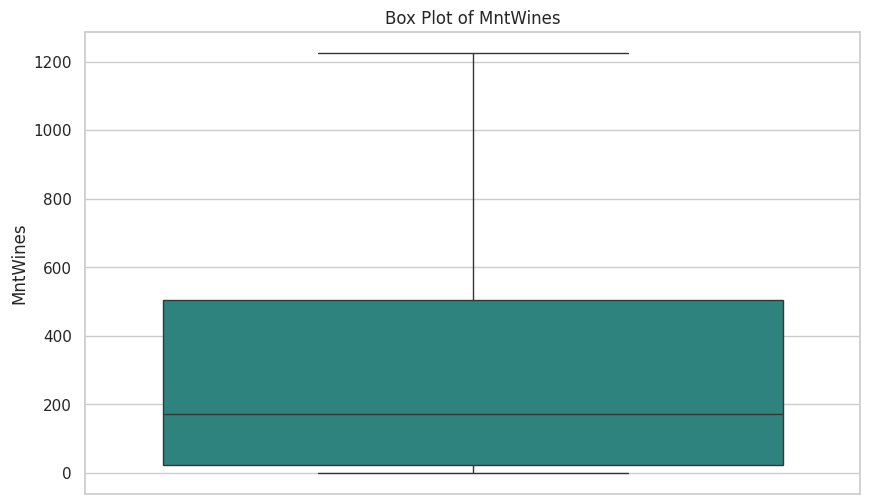

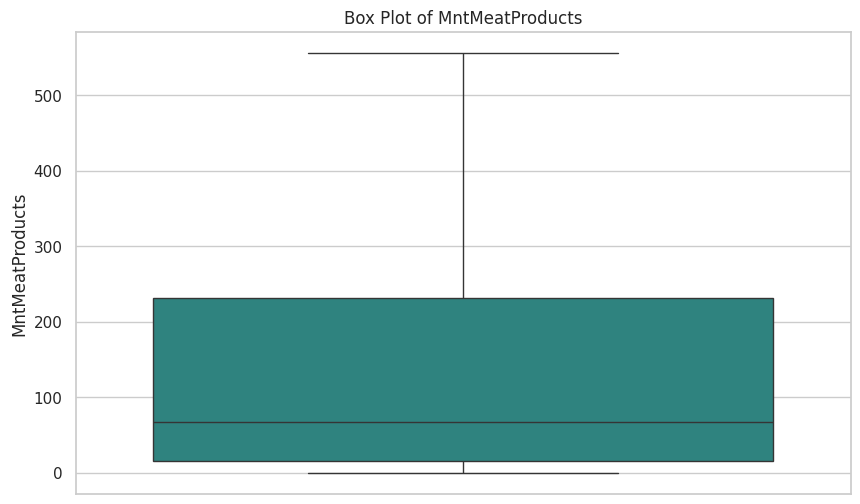

In [98]:
for col in ['Income', 'Age', 'Total_Spent', 'MntWines', 'MntMeatProducts']:
  plt.figure(figsize=(10,6))
  sns.boxplot(data=df, y=col,palette='viridis')
  plt.title(f'Box Plot of {col}')
  plt.show()

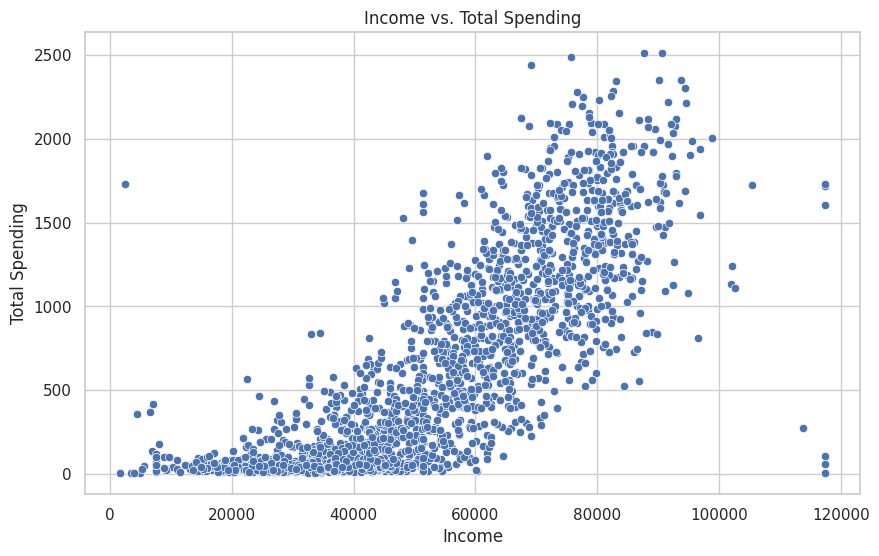

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spent', data=df, palette='viridis')
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

In [100]:
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


In [101]:
corr_matrix = df.select_dtypes(include=['number']).corr()


In [102]:
corr_matrix = corr_matrix.dropna(axis=0, how='all')
corr_matrix = corr_matrix.dropna(axis=1, how='all')

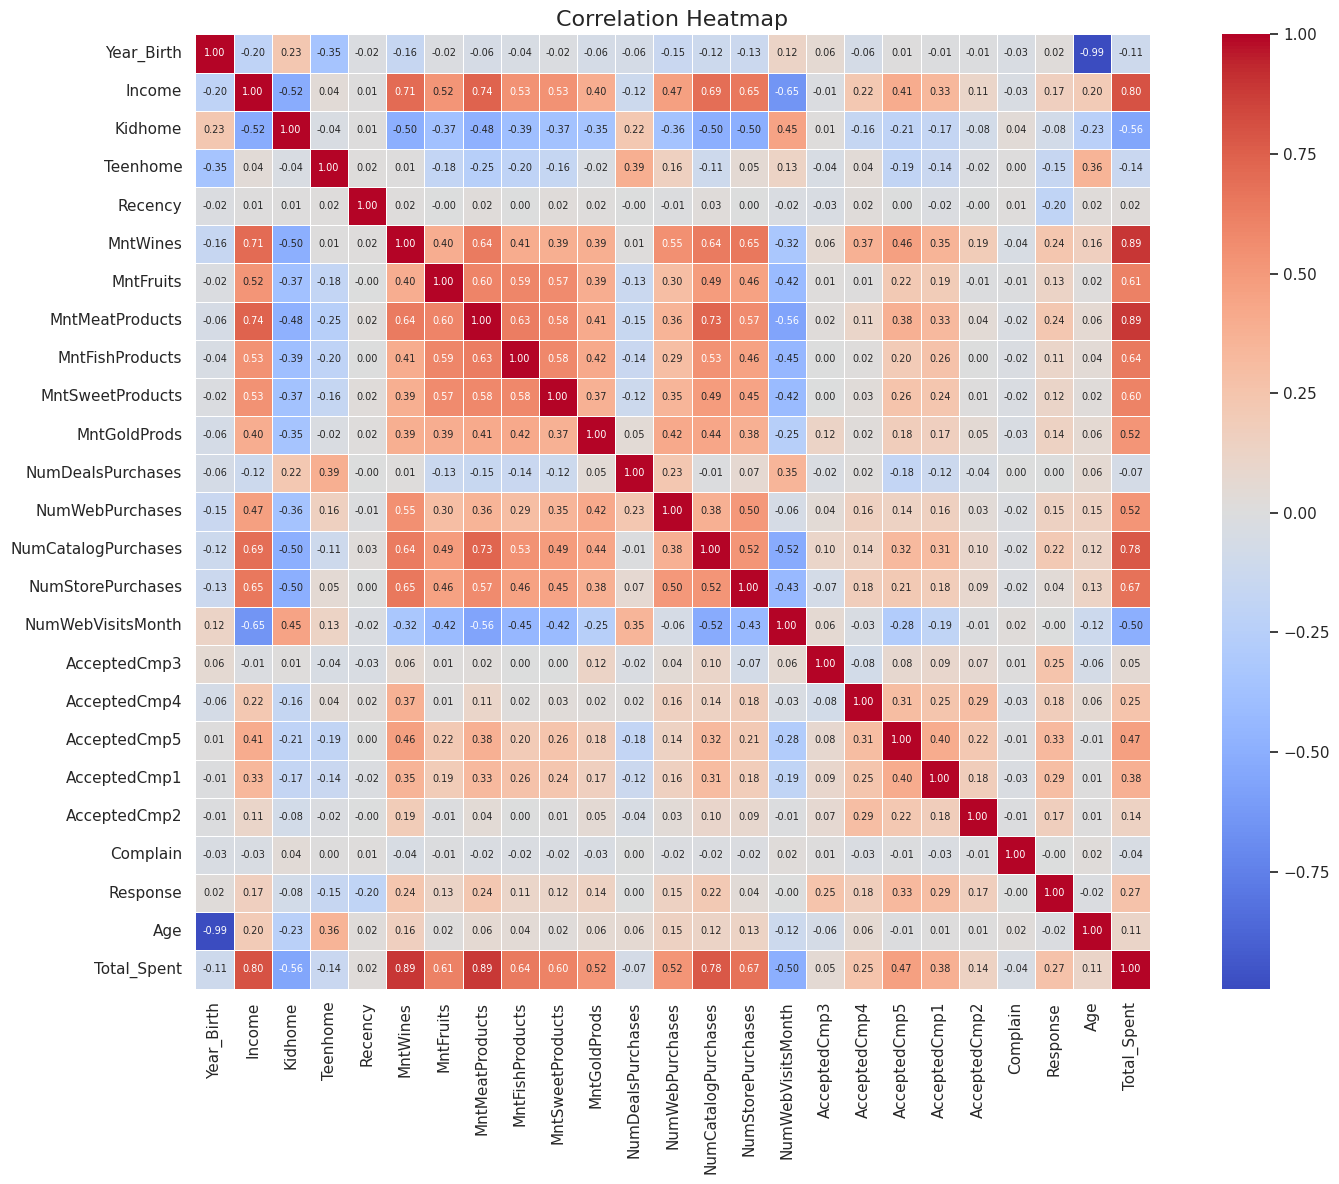

In [103]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 7}
)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* The heatmap highlights strong positive correlations between spending features (e.g., Total_Spent and MntWines), and a moderate positive link between Income and overall spending.

* Most features show low correlation with Response, suggesting other behavioral or external factors influence campaign success.



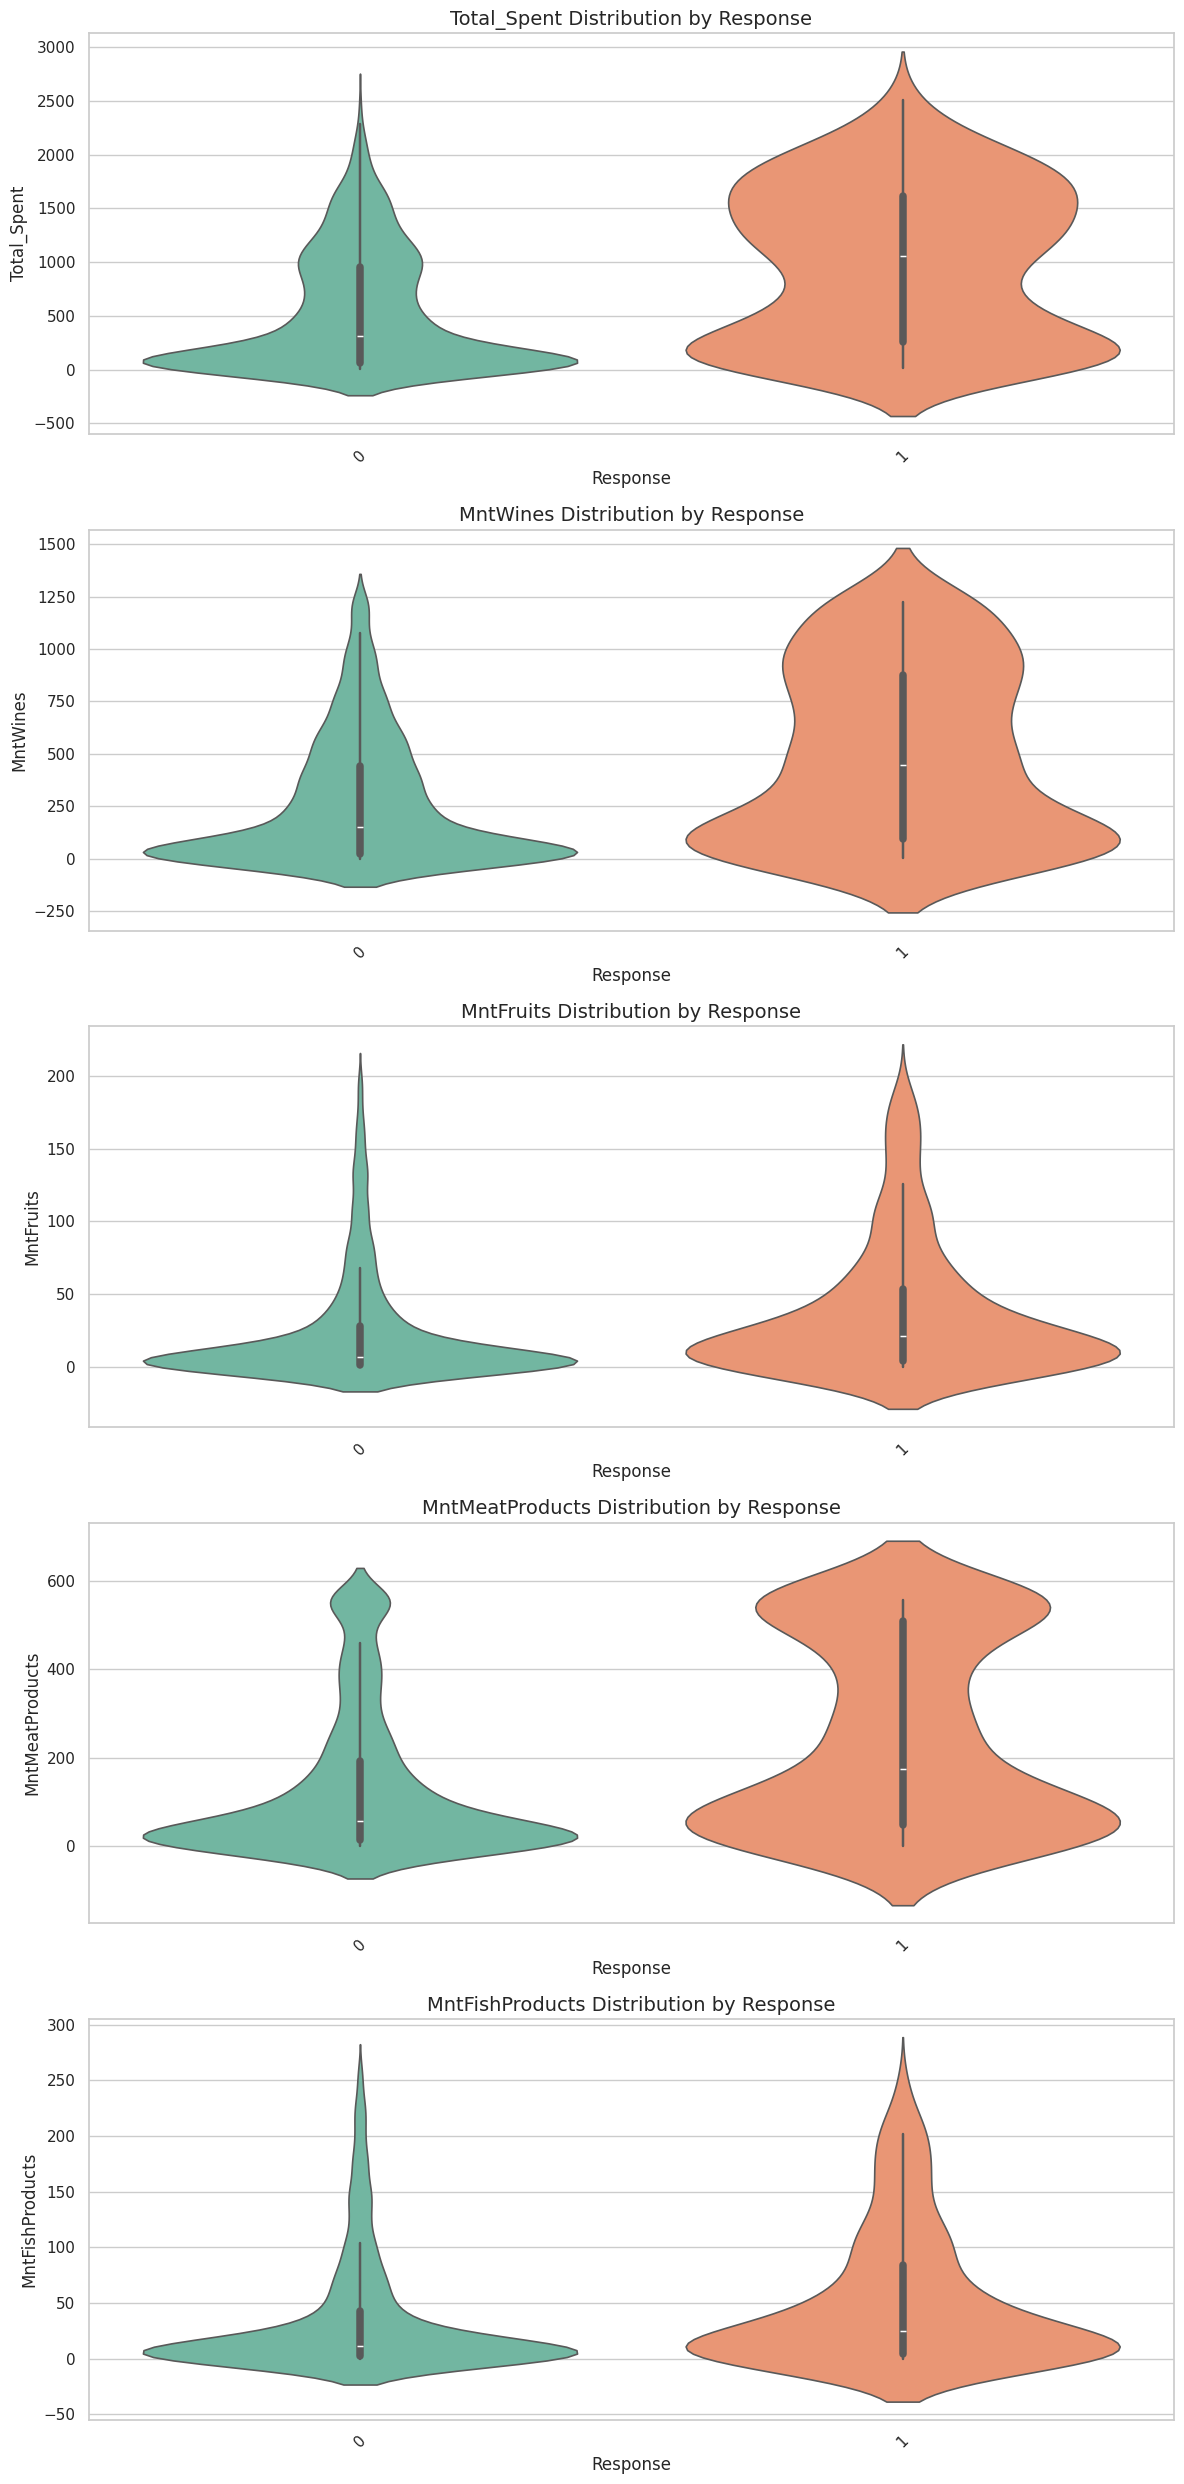

In [104]:
features_to_plot = ['Total_Spent', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
x_var = 'Response'

# Set seaborn color palette
sns.set(style="whitegrid", palette="pastel")

# Create subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 5 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    sns.violinplot(
        ax=axes[i],
        data=df,
        x=x_var,
        y=feature,
        palette='Set2',
        inner='box',
        scale='width',
        linewidth=1.2
    )
    axes[i].set_title(f'{feature} Distribution by {x_var}', fontsize=14)
    axes[i].set_xlabel(x_var)
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

## The plots suggest that total spend and wine consumption are strong indicators of campaign responsiveness. Future campaigns should prioritize high spenders, especially those with a preference for wine.



In [105]:
df_clean = df.drop(columns=['Dt_Customer', 'Education', 'Marital_Status'])


In [106]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [107]:
le =LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [108]:
df_clean = df.drop(columns=[ 'Dt_Customer', 'Education', 'Marital_Status'])

# Fill missing values
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

In [109]:
df_numeric = df.select_dtypes(exclude=['datetime64[ns]', 'datetime64[ns, UTC]'])



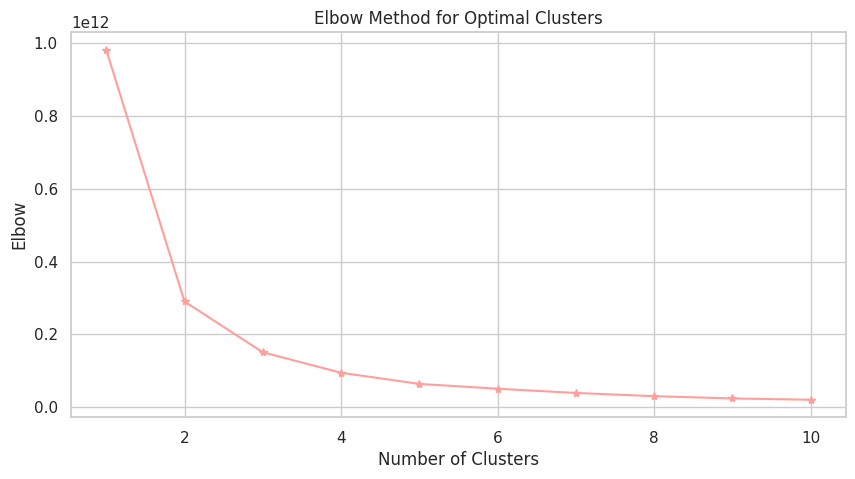

In [110]:
Elbo = []
for i in range(1, 11):
    k_mean = KMeans(n_clusters=i, random_state=42)
    k_mean.fit(df_numeric)
    Elbo.append(k_mean.inertia_)



# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), Elbo, marker='*', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

In [111]:
print(k_mean.inertia_)

19835980069.62013


In [112]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_clean)

KMeans(n_clusters=3, random_state=42)

In [118]:
# prompt: y_name

y_name = kmeans.labels_

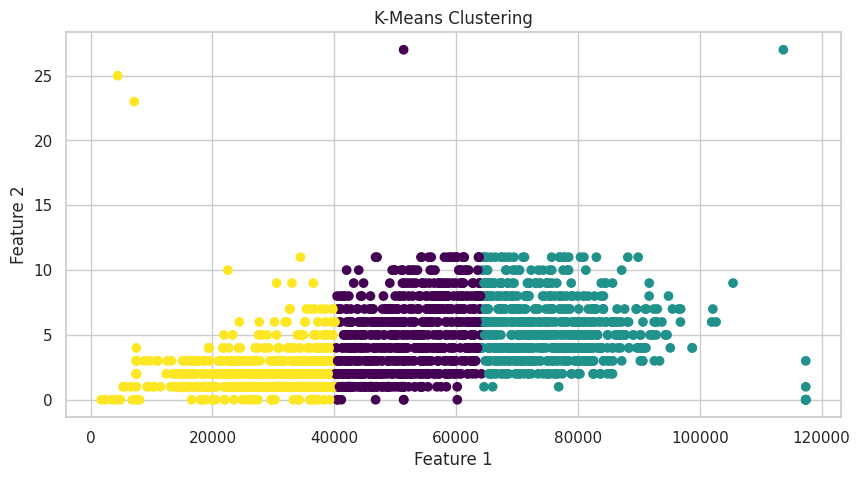

In [119]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Income'], df['NumWebPurchases'], c=y_name, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [120]:
scores = silhouette_score(df_clean, kmeans.labels_)
print(f'Silhouette Score: {scores}')

Silhouette Score: 0.5473672883328639


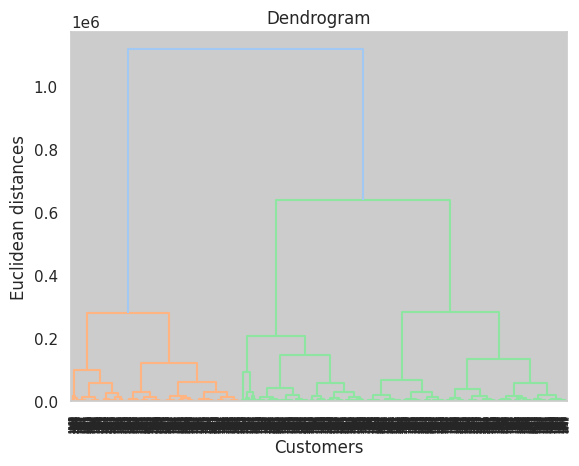

In [121]:
sch.dendrogram(sch.linkage(df_clean, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [122]:
best_score = -1
best_params = {}

for n in range(2, 10):  # Try cluster numbers from 2 to 9
    for linkage in ["ward", "complete", "average", "single"]:
        # Note: 'ward' only supports Euclidean distance
        if linkage == "ward":
            model = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        else:
            model = AgglomerativeClustering(n_clusters=n, linkage=linkage)

        labels = model.fit_predict(df_clean)
        score = silhouette_score(df_clean, labels)

        if score > best_score:
            best_score = score
            best_params = {"n_clusters": n, "linkage": linkage}

print(f"✅ Best Params: {best_params}, 🏆 Best Silhouette Score: {best_score:.4f}")

✅ Best Params: {'n_clusters': 2, 'linkage': 'average'}, 🏆 Best Silhouette Score: 0.5859


In [123]:
ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag.fit(df_clean)

AgglomerativeClustering()

In [124]:
y_agg=ag.fit_predict(df_clean)

In [125]:
clusters=pd.DataFrame(y_agg,columns=['clusters'])
clusters

clusters
0            0
1            0
2            0
3            1
4            0
...        ...
2235         0
2236         0
2237         0
2238         0
2239         0

[2240 rows x 1 columns]

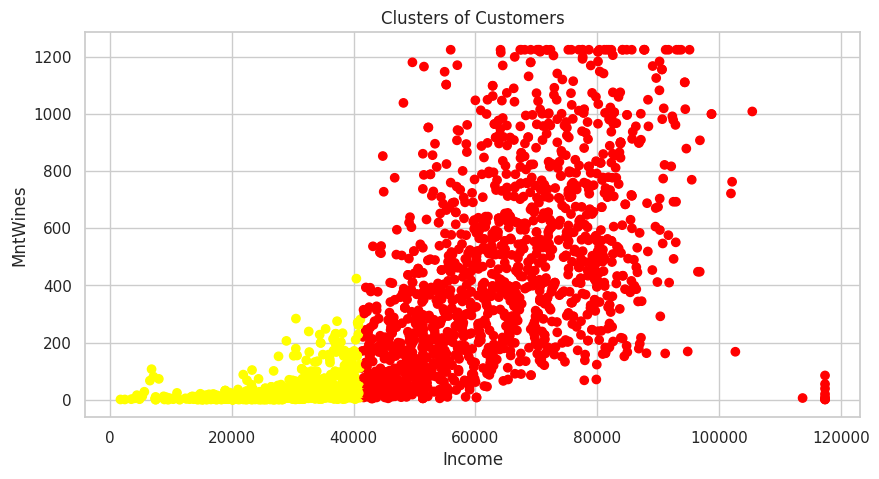

<Figure size 640x480 with 0 Axes>

In [126]:
# ploting the clusters
plt.figure(figsize=(10,5))
plt.scatter(df['Income'], df['MntWines'], c=clusters['clusters'], cmap='autumn')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('Clusters of Customers')
plt.show()
plt.tight_layout()


In [127]:
score=silhouette_score(df_clean,ag.labels_)
print("Silhouette Score:", score)
print(f"{score:.2f}")

Silhouette Score: 0.5455549882516597
0.55


In [128]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as nb

In [129]:
neighbors = nb(n_neighbors=2).fit(df_clean)
distances, indices = neighbors.kneighbors(df_clean)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]


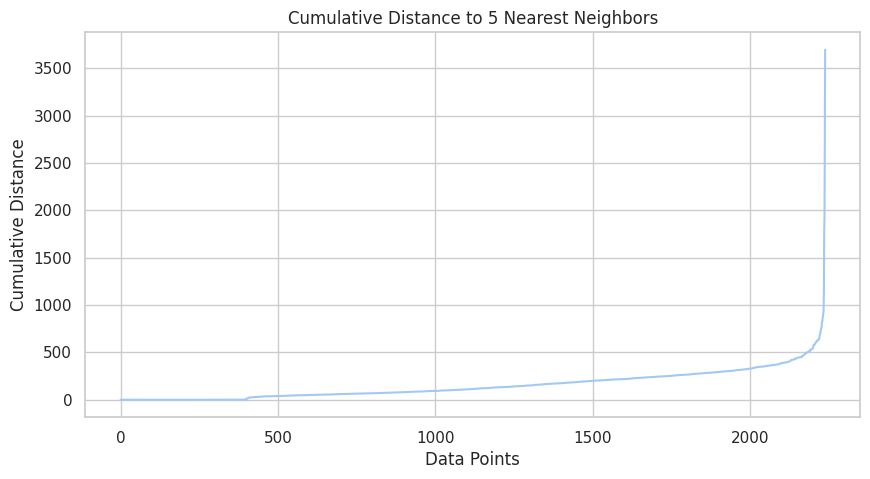

In [130]:
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Cumulative Distance")
plt.title("Cumulative Distance to 5 Nearest Neighbors")
plt.show()

In [131]:
dbscan=DBSCAN(eps=0.25,min_samples=21)
dbscan.fit(df_clean)

DBSCAN(eps=0.25, min_samples=21)

In [132]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [133]:
from sklearn.metrics import silhouette_score
if len(set(dbscan.labels_)) > 1:
    score = silhouette_score(df, dbscan.labels_)
    print("Silhouette Score:", score)
else:
    print("DBSCAN found only one cluster or all points are noise.")

DBSCAN found only one cluster or all points are noise.


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [135]:
df1=pd.read_excel('/content/marketing_campaign1 (1) (1).xlsx')

In [136]:
# Drop unnecessary columns
df_cleaned = df1.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',"Year_Birth"],inplace=True)


In [137]:
df1.dropna(inplace=True)

In [138]:
le=LabelEncoder()
df1['Education']=le.fit_transform(df1['Education'])
df1['Marital_Status']=le.fit_transform(df1['Marital_Status'])

In [139]:
x=df1.drop("Complain",axis=1)
y=df1["Complain"]

In [140]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2216, dtype: int64

In [141]:
x

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             2               4  58138.0        0         0       58   
1             2               4  46344.0        1         1       38   
2             2               5  71613.0        0         0       26   
3             2               5  26646.0        1         0       26   
4             4               3  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2235          2               3  61223.0        0         1       46   
2236          4               5  64014.0        2         1       56   
2237          2               2  56981.0        0         0       91   
2238          3               5  69245.0        0         1        8   
2239          4               3  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2235       709         43              182               42  ...   
2236       406          0               30                0  ...   
2237       908         48              217               32  ...   
2238       428         30              214               80  ...   
2239        84          3               61                2  ...   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  
0                0             0         1  
1                0             0         0  
2                0             0         0  
3                0             0         0  
4                0             0         0  
...            ...           ...       ...  
2235             0             0         0  
2236             1             0         0  
2237             0             0         0  
2238             0             0         0  
2239             0             0         1  

[2216 rows x 23 columns]

In [142]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [144]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [145]:
y_pred = lr.predict(x_test)

In [146]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [147]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("~"*50)
print("Confusion Matrix:\n", conf_matrix)
print("~"*50)
print("Classification Report:\n", class_rep)
print("~"*50)
print(f"Precision: {precision:.2f}")
print("~"*50)
print(f"Recall: {recall:.2f}")
print("~"*50)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.99
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matrix:
 [[440   0]
 [  4   0]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       440
           1       0.00      0.00      0.00         4

    accuracy                           0.99       444
   macro avg       0.50      0.50      0.50       444
weighted avg       0.98      0.99      0.99       444

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Precision: 0.00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Recall: 0.00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
F1 Score: 0.00


In [153]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
# prompt: create pickle streamlit.app py
import pickle
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the pre-trained model and scaler
# Assuming 'lr' is your trained LogisticRegression model from the previous code
# Assuming 'scaler' is your fitted StandardScaler from the previous code

# Save the trained model and scaler as pickle files
try:
    with open('logistic_regression_model.pkl', 'wb') as model_file:
        pickle.dump(lr, model_file)

    with open('scaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print("Model and scaler successfully pickled.")

    # --- Streamlit App ---
    # Create a Python file named `streamlit_app.py` with the following content:
    streamlit_app_code = """
import streamlit as st
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the pre-trained model and scaler
try:
    with open('logistic_regression_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    st.success("Model and scaler loaded successfully.")
except FileNotFoundError:
    st.error("Model or scaler file not found. Please make sure 'logistic_regression_model.pkl' and 'scaler.pkl' are in the same directory.")
    model = None
    scaler = None

st.title('Customer Complaint Prediction')

if model and scaler:
    st.write("Enter the customer's details to predict if they will complain.")

    # Get input features from the user
    income = st.number_input('Income', min_value=0.0, format="%.2f")
    kidhome = st.slider('Number of Kids at Home', 0, 2, 0)
    teenhome = st.slider('Number of Teens at Home', 0, 2, 0)
    recency = st.number_input('Days since last purchase', min_value=0, format="%d")
    mntwines = st.number_input('Amount spent on Wine', min_value=0, format="%d")
    mntfruits = st.number_input('Amount spent on Fruits', min_value=0, format="%d")
    mntmeatproducts = st.number_input('Amount spent on Meat Products', min_value=0, format="%d")
    mntfishproducts = st.number_input('Amount spent on Fish Products', min_value=0, format="%d")
    mntsweetproducts = st.number_input('Amount spent on Sweet Products', min_value=0, format="%d")
    mntgoldprods = st.number_input('Amount spent on Gold Products', min_value=0, format="%d")
    numdealpurchases = st.number_input('Number of purchases with discount', min_value=0, format="%d")
    numwebpurchases = st.number_input('Number of purchases made through company website', min_value=0, format="%d")
    numcatalogpurchases = st.number_input('Number of purchases made using catalogue', min_value=0, format="%d")
    numstorepurchases = st.number_input('Number of purchases made directly in store', min_value=0, format="%d")
    numwebvisitsmonth = st.number_input('Number of visits to company website in the last month', min_value=0, format="%d")
    acceptedcmp3 = st.selectbox('Accepted Campaign 3', [0, 1])
    acceptedcmp4 = st.selectbox('Accepted Campaign 4', [0, 1])
    acceptedcmp5 = st.selectbox('Accepted Campaign 5', [0, 1])
    acceptedcmp1 = st.selectbox('Accepted Campaign 1', [0, 1])
    acceptedcmp2 = st.selectbox('Accepted Campaign 2', [0, 1])
    response = st.selectbox('Accepted last campaign (Response)', [0, 1])
    # Assuming Education and Marital_Status were encoded. Need to get the original labels.
    # For simplicity here, we'll assume the label encoding order was preserved.
    # In a real app, you'd need to load the LabelEncoders or map inputs to encoded values.
    education_mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4} # Example mapping based on previous code
    marital_status_mapping = {'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7} # Example mapping

    education = st.selectbox('Education Level', list(education_mapping.keys()))
    marital_status = st.selectbox('Marital Status', list(marital_status_mapping.keys()))

    # Convert selected labels to encoded values
    education_encoded = education_mapping[education]
    marital_status_encoded = marital_status_mapping[marital_status]

    # Create a DataFrame from user inputs
    input_data = pd.DataFrame({
        'Income': [income],
        'Kidhome': [kidhome],
        'Teenhome': [teenhome],
        'Recency': [recency],
        'MntWines': [mntwines],
        'MntFruits': [mntfruits],
        'MntMeatProducts': [mntmeatproducts],
        'MntFishProducts': [mntfishproducts],
        'MntSweetProducts': [mntsweetproducts],
        'MntGoldProds': [mntgoldprods],
        'NumDealsPurchases': [numdealpurchases],
        'NumWebPurchases': [numwebpurchases],
        'NumCatalogPurchases': [numcatalogpurchases],
        'NumStorePurchases': [numstorepurchases],
        'NumWebVisitsMonth': [numwebvisitsmonth],
        'AcceptedCmp3': [acceptedcmp3],
        'AcceptedCmp4': [acceptedcmp4],
        'AcceptedCmp5': [acceptedcmp5],
        'AcceptedCmp1': [acceptedcmp1],
        'AcceptedCmp2': [acceptedcmp2],
        'Response': [response],
        'Education': [education_encoded],
        'Marital_Status': [marital_status_encoded]
    })

    # Scale the input data
    scaled_input_data = scaler.transform(input_data)

    if st.button('Predict'):
        prediction = model.predict(scaled_input_data)
        if prediction[0] == 1:
        else:
            st.success('Prediction: The customer is unlikely to complain.')

else:
    st.warning("Model not loaded. Please ensure model and scaler files are available.")

"""
    with open('streamlit_app.py', 'w') as f:
        f.write(streamlit_app_code)

    print("Created streamlit_app.py")
    print("You can now run this Streamlit app from your terminal using: streamlit run streamlit_app.py")

except Exception as e:
    print(f"An error occurred during pickling or file creation: {e}")



In [157]:
# prompt: create pickle streamlit.app py

import pickle
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the pre-trained model and scaler
# Assuming 'lr' is your trained LogisticRegression model from the previous code
# Assuming 'scaler' is your fitted StandardScaler from the previous code

# Save the trained model and scaler as pickle files
try:
    with open('logistic_regression_model.pkl', 'wb') as model_file:
        pickle.dump(lr, model_file)

    with open('scaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    print("Model and scaler successfully pickled.")

    # --- Streamlit App ---
    # Create a Python file named `streamlit_app.py` with the following content:
    streamlit_app_code = """
import streamlit as st
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the pre-trained model and scaler
try:
    with open('logistic_regression_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    with open('scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    st.success("Model and scaler loaded successfully.")
except FileNotFoundError:
    st.error("Model or scaler file not found. Please make sure 'logistic_regression_model.pkl' and 'scaler.pkl' are in the same directory.")
    model = None
    scaler = None

st.title('Customer Complaint Prediction')

if model and scaler:
    st.write("Enter the customer's details to predict if they will complain.")

    # Get input features from the user
    income = st.number_input('Income', min_value=0.0, format="%.2f")
    kidhome = st.slider('Number of Kids at Home', 0, 2, 0)
    teenhome = st.slider('Number of Teens at Home', 0, 2, 0)
    recency = st.number_input('Days since last purchase', min_value=0, format="%d")
    mntwines = st.number_input('Amount spent on Wine', min_value=0, format="%d")
    mntfruits = st.number_input('Amount spent on Fruits', min_value=0, format="%d")
    mntmeatproducts = st.number_input('Amount spent on Meat Products', min_value=0, format="%d")
    mntfishproducts = st.number_input('Amount spent on Fish Products', min_value=0, format="%d")
    mntsweetproducts = st.number_input('Amount spent on Sweet Products', min_value=0, format="%d")
    mntgoldprods = st.number_input('Amount spent on Gold Products', min_value=0, format="%d")
    numdealpurchases = st.number_input('Number of purchases with discount', min_value=0, format="%d")
    numwebpurchases = st.number_input('Number of purchases made through company website', min_value=0, format="%d")
    numcatalogpurchases = st.number_input('Number of purchases made using catalogue', min_value=0, format="%d")
    numstorepurchases = st.number_input('Number of purchases made directly in store', min_value=0, format="%d")
    numwebvisitsmonth = st.number_input('Number of visits to company website in the last month', min_value=0, format="%d")
    acceptedcmp3 = st.selectbox('Accepted Campaign 3', [0, 1])
    acceptedcmp4 = st.selectbox('Accepted Campaign 4', [0, 1])
    acceptedcmp5 = st.selectbox('Accepted Campaign 5', [0, 1])
    acceptedcmp1 = st.selectbox('Accepted Campaign 1', [0, 1])
    acceptedcmp2 = st.selectbox('Accepted Campaign 2', [0, 1])
    response = st.selectbox('Accepted last campaign (Response)', [0, 1])
    # Assuming Education and Marital_Status were encoded. Need to get the original labels.
    # For simplicity here, we'll assume the label encoding order was preserved.
    # In a real app, you'd need to load the LabelEncoders or map inputs to encoded values.
    education_mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4} # Example mapping based on previous code
    marital_status_mapping = {'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7} # Example mapping

    education = st.selectbox('Education Level', list(education_mapping.keys()))
    marital_status = st.selectbox('Marital Status', list(marital_status_mapping.keys()))

    # Convert selected labels to encoded values
    education_encoded = education_mapping[education]
    marital_status_encoded = marital_status_mapping[marital_status]

    # Create a DataFrame from user inputs
    input_data = pd.DataFrame({
        'Income': [income],
        'Kidhome': [kidhome],
        'Teenhome': [teenhome],
        'Recency': [recency],
        'MntWines': [mntwines],
        'MntFruits': [mntfruits],
        'MntMeatProducts': [mntmeatproducts],
        'MntFishProducts': [mntfishproducts],
        'MntSweetProducts': [mntsweetproducts],
        'MntGoldProds': [mntgoldprods],
        'NumDealsPurchases': [numdealpurchases],
        'NumWebPurchases': [numwebpurchases],
        'NumCatalogPurchases': [numcatalogpurchases],
        'NumStorePurchases': [numstorepurchases],
        'NumWebVisitsMonth': [numwebvisitsmonth],
        'AcceptedCmp3': [acceptedcmp3],
        'AcceptedCmp4': [acceptedcmp4],
        'AcceptedCmp5': [acceptedcmp5],
        'AcceptedCmp1': [acceptedcmp1],
        'AcceptedCmp2': [acceptedcmp2],
        'Response': [response],
        'Education': [education_encoded],
        'Marital_Status': [marital_status_encoded]
    })

    # Scale the input data
    scaled_input_data = scaler.transform(input_data)

    if st.button('Predict'):
        prediction = model.predict(scaled_input_data)
        if prediction[0] == 1:
        else:
            st.success('Prediction: The customer is unlikely to complain.')

else:
    st.warning("Model not loaded. Please ensure model and scaler files are available.")

"""
    with open('streamlit_app.py', 'w') as f:
        f.write(streamlit_app_code)

    print("Created streamlit_app.py")
    print("You can now run this Streamlit app from your terminal using: streamlit run streamlit_app.py")

except Exception as e:
    print(f"An error occurred during pickling or file creation: {e}")



Model and scaler successfully pickled.
Created streamlit_app.py
You can now run this Streamlit app from your terminal using: streamlit run streamlit_app.py
